In [1]:
%load_ext autoreload
%autoreload 2


import numpy as np
import networkx as nx
import logging, sys
import cstrees.scoring as sc
import cstrees.cstree as ct

import matplotlib.pyplot as plt

logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)

# CStree from Figure 1 in (Duarte & Solus, 2022)


DEBUG:matplotlib:CACHEDIR=/home/f/l/flrios/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/f/l/flrios/.cache/matplotlib/fontlist-v330.json


In [ ]:
np.random.seed(3)
p=4
cards = [2] * p
co = ct.CausalOrder(range(p))
tree = ct.CStree(co)


#stage = ct.sample_random_stage(cards,2)
#stage.set_random_params(cards)

tree.set_cardinalities(cards)

# These do not have to be in a dict like this as the levels are
# determined from the length of the tuples.

tree.set_stages({
    0: [],
    1: [ct.Stage([{0, 1}, 0])],    # Green
    2: [ct.Stage([0, {0, 1}, 0]),  # Blue
        ct.Stage([0, {0, 1}, 1]),  # Orange
        ct.Stage([1, {0, 1}, 0])]  # Red
})


tree.set_random_stage_parameters()


a = tree.plot()
a.draw("testplot.png")
x = tree.sample(5)

#x = tree.sample(5)
print(x)

s = sc.score(tree, x, alpha_tot=1.0, method="K2")
print(s)
#rels = tree.csi_relations()

#print("Initial rels")
#print(rels)
adjmats = tree.to_minimal_context_graphs()

for key, graph in adjmats.items():
    agraph = nx.nx_agraph.to_agraph(graph)
    agraph.layout("dot")
    agraph.draw(str(key) + "_csi.png", args='-Glabel="'+str(key)+'"   ')
a

In [2]:

p=4
cards = [2] * p

DEBUG:root:getting csirels per level
DEBUG:root:{0: [<cstrees.cstree.Stage object at 0x7fb2d6f0adf0>], 1: [<cstrees.cstree.Stage object at 0x7fb2d6f0ac70>, <cstrees.cstree.Stage object at 0x7fb2d6f0af70>], 2: [<cstrees.cstree.Stage object at 0x7fb2d6f0a7c0>, <cstrees.cstree.Stage object at 0x7fb2d6f0a7f0>], 3: [], -1: [<cstrees.cstree.Stage object at 0x7fb2d6f0a040>]}
DEBUG:root:rels
DEBUG:root:{0: [<cstrees.cstree.CSI_relation object at 0x7fb2d6ebce20>], 1: [<cstrees.cstree.CSI_relation object at 0x7fb2d6ebcd00>, <cstrees.cstree.CSI_relation object at 0x7fb2d6ed3160>], 2: [<cstrees.cstree.CSI_relation object at 0x7fb2d6ed3280>, <cstrees.cstree.CSI_relation object at 0x7fb2d6ed33a0>], 3: [], -1: [<cstrees.cstree.CSI_relation object at 0x7fb2d6ed34c0>]}
DEBUG:root:X0 ⊥  X1
DEBUG:root:X1 ⊥  X2, X0=0
DEBUG:root:X1 ⊥  X2, X0=1
DEBUG:root:X0, X2 ⊥  X3, X1=0
DEBUG:root:X0, X2 ⊥  X3, X1=1
DEBUG:root: ⊥  X0
DEBUG:root:###### paired_csis
DEBUG:root:[{(0, 1): [[None, None]]}, {(1, 2): [[{0}, Non

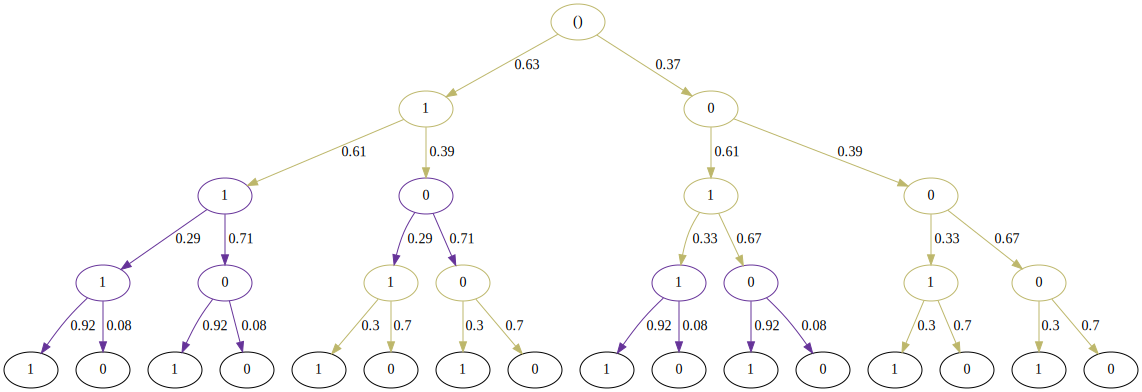

In [3]:
np.random.seed(5)

t = ct.sample_cstree(cards, max_cvars=1, prob_cvar=0.5, prop_nonsingleton=1)
t.set_random_stage_parameters()
t.create_tree()
t.set_random_parameters()
a = t.plot()
x = t.sample(1500)
#plt.savefig("testplot.png")

true_cdags = t.to_minimal_context_graphs()
for key, val in true_cdags.items():
    agraph = nx.nx_agraph.to_agraph(val)
    agraph.layout("dot")
    agraph.draw("testing/"+str(key) + "_true.png", args='-Glabel="'+str(key)+'"   ')
a

Level 0
[{0, 1}] {0: 585, 1: 915}
Level 1
[1, {0, 1}] {0: 654, 1: 251}
[0, {0, 1}] {1: 176, 0: 419}
Level 2
[{0, 1}, 0, {0, 1}] {0: 414, 1: 171}
[{0, 1}, 1, {0, 1}] {1: 842, 0: 73}
Level 3
Level -1
[] {1: 905, 0: 595}


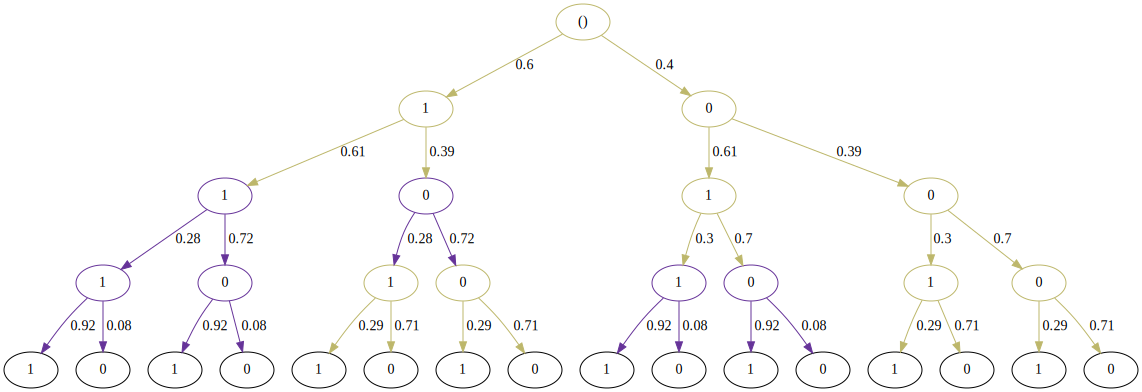

In [4]:
t.estimate_stage_parameters(x, alpha_tot=1.0, method="BDeu")
t.create_tree()
t.set_random_parameters()
a = t.plot()
a

In [200]:
order = [0, 1, 2]

perm = [1,0,2]
xperm = x[:, perm]

#order = [2,0, 1, 3]

s1 = sc.score_order(order, x, max_cvars=1, alpha_tot=1.0, method="BDeu")
s2 = sc.score_order(perm, xperm, max_cvars=1, alpha_tot=1.0, method="BDeu")
print(s1)
print(s2)

-2911.655268658996
-2911.655268658996


order: [0, 1, 2, 3], score: -3533.9489616559867
order: [0, 1, 3, 2], score: -3533.9489616559867
order: [0, 2, 1, 3], score: -3533.9489616559867
order: [0, 2, 3, 1], score: -3533.9489616559877
order: [0, 3, 1, 2], score: -3533.9489616559877
order: [0, 3, 2, 1], score: -3533.9489616559877
order: [1, 0, 2, 3], score: -3533.9489616559867
order: [1, 0, 3, 2], score: -3533.9489616559867
order: [1, 2, 0, 3], score: -3533.9489616559867
order: [1, 2, 3, 0], score: -3533.9489616559867
order: [1, 3, 0, 2], score: -3533.9489616559867
order: [1, 3, 2, 0], score: -3533.9489616559867
order: [2, 0, 1, 3], score: -3533.9489616559867
order: [2, 0, 3, 1], score: -3533.9489616559877
order: [2, 1, 0, 3], score: -3533.9489616559867
order: [2, 1, 3, 0], score: -3533.9489616559867
order: [2, 3, 0, 1], score: -3533.9489616559877
order: [2, 3, 1, 0], score: -3533.9489616559877
order: [3, 0, 1, 2], score: -3533.9489616559877
order: [3, 0, 2, 1], score: -3533.9489616559877
order: [3, 1, 0, 2], score: -3533.948961

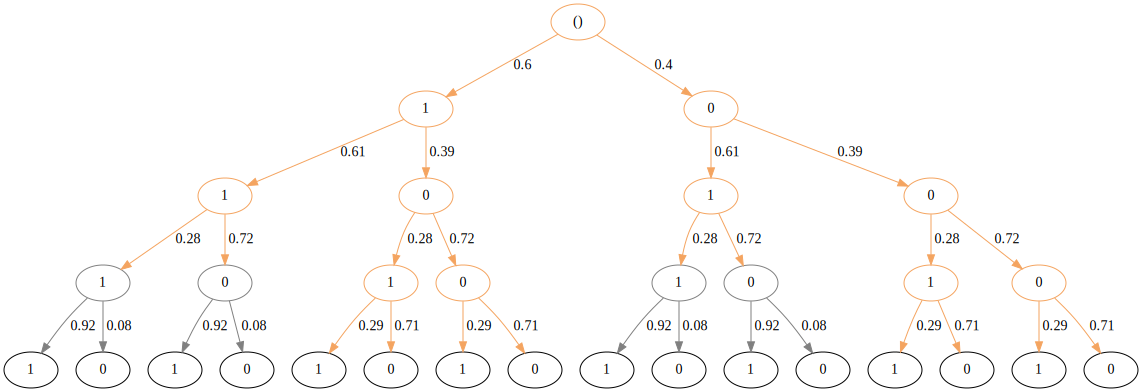

In [5]:
optord, score = ct.find_optimal_order(x, strategy="max", max_cvars=1, alpha_tot=1.0, method="BDeu")
print("optimal order: {}, score {}".format(optord, score))

opttree = ct.optimal_cstree(optord, cards, x, max_cvars=1, alpha_tot=1.0, method="BDeu")
print("stages :{}".format(opttree.stages))
opttree.estimate_stage_parameters(x, alpha_tot=1.0, method="BDeu")
opttree.create_tree()
opttree.set_random_parameters()
opttree.plot()

In [6]:
cdags = opttree.to_minimal_context_graphs()
for key, graph in cdags.items():
    print("key: {}".format(key))
    print(graph.edges())
    print(graph.nodes())


DEBUG:root:getting csirels per level
DEBUG:root:{0: [<cstrees.cstree.Stage object at 0x7fb314ee39d0>], 1: [<cstrees.cstree.Stage object at 0x7fb314ee34f0>], 2: [<cstrees.cstree.Stage object at 0x7fb2d6eeaa90>, <cstrees.cstree.Stage object at 0x7fb2d6eeabb0>], 3: [], -1: [<cstrees.cstree.Stage object at 0x7fb314ee3460>]}
DEBUG:root:rels
DEBUG:root:{0: [<cstrees.cstree.CSI_relation object at 0x7fb2d6f0c8b0>], 1: [<cstrees.cstree.CSI_relation object at 0x7fb2d6f0c3a0>], 2: [<cstrees.cstree.CSI_relation object at 0x7fb2d6f0c370>, <cstrees.cstree.CSI_relation object at 0x7fb2d6f0cd30>], 3: [], -1: [<cstrees.cstree.CSI_relation object at 0x7fb2d6f0c250>]}
DEBUG:root:X0 ⊥  X1
DEBUG:root:X0, X1 ⊥  X2
DEBUG:root:X0, X2 ⊥  X3, X1=0
DEBUG:root:X0, X2 ⊥  X3, X1=1
DEBUG:root: ⊥  X0
DEBUG:root:###### paired_csis
DEBUG:root:[{(0, 1): [[None, None]]}, {(0, 2): [[None, {0, 1}, None]], (1, 2): [[{0, 1}, None, None]]}, {(0, 3): [[None, {0}, {0, 1}, None], [None, {1}, {0, 1}, None]], (2, 3): [[{0, 1}, {0}

key: None
[(1, 3)]
[0, 1, 2, 3]


max staging: ['[]']
max staging: ['[{0, 1}]']
max staging: ['[{0, 1}, 0]', '[{0, 1}, 1]']
max staging: ['[{0, 1}, 0, {0, 1}]', '[{0, 1}, 1, {0, 1}]']
Level 0
[{0, 1}] {1: 704, 0: 296}
Level 1
[{0, 1}, 1] {1: 397, 0: 307}
[{0, 1}, 0] {0: 188, 1: 108}
Level 2
[{0, 1}, 1, {0, 1}] {0: 696, 1: 8}
[{0, 1}, 0, {0, 1}] {0: 245, 1: 51}
Level 3
Level -1
[] {1: 311, 0: 689}


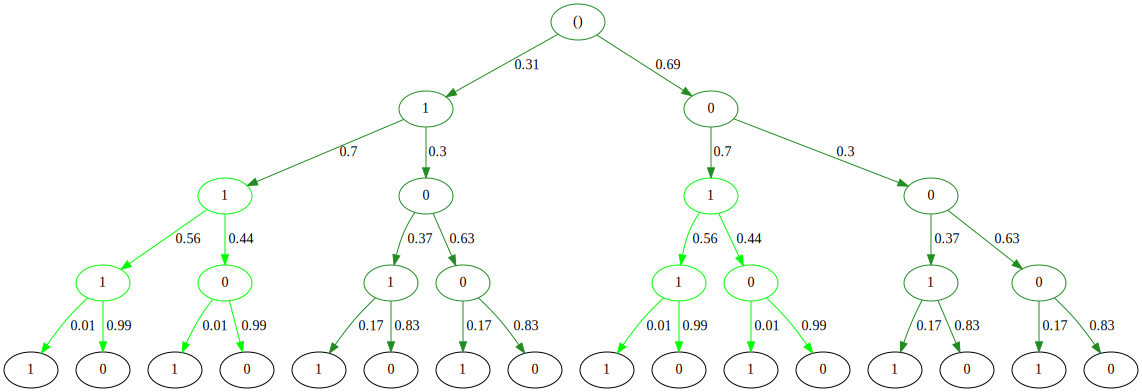

In [154]:
order = [0, 1, 2, 3]

opttree = ct.optimal_cstree(order, cards, x, max_cvars=1, alpha_tot=1.0, method="BDeu")
#print("stages :{}".format(opttree.stages))
opttree.estimate_stage_parameters(x, alpha_tot=1.0, method="BDeu")
opttree.create_tree()
opttree.set_random_parameters()
opttree.plot()

In [ ]:
optord = ct.find_optimal_order(x, max_cvars=1, alpha_tot=1.0, method="BDeu")

In [ ]:

order = [0, 1, 2, 3]
score = sc.score_order(order, cards, x, max_cvars=1, alpha_tot=1.0, method="BDeu")
print(score)
 

In [ ]:
stagings = ct.all_stagings(order, cards, level, max_cvars=1)
print("#Stagings")
nst = ct.n_stagings(order, cards, level, max_cvars=1)
print(nst)
print("Stagings")
for ss in stagings:
    for s in ss:
        print(s)

In [ ]:
for l in range(len(order)):
    max_staging, max_score = ct.optimal_staging_at_level(order, cards, x, l, max_cvars=1, alpha_tot=1.0, method="BDeu")
    print("best staging at level {}".format(l))
    print(max_score)   
    for st in max_staging:
        print(st)

    